# La6 Assignment  : Data Classification (k-Nearest Neighbor)

Stduent ID:

Name:

### Problem: Predicting the age of abalone from physical measurements.

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task.  Other measurements, which are easier to obtain, are used to predict the age.
Ref: https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names

#### Feature Description:
1. Sex --> M, F, and I (infant)
2. Length (mm) --> Longest shell measurement
3. Diameter (mm) --> perpendicular to length
3. Height (mm) --> with meat in shell
5. Whole weight (grams) --> whole abalone
6. Shucked weight (grams) --> weight of meat
7. Viscera weight (grams) --> gut weight (after bleeding)
8. Shell weight (grams) --> after being dried
9. Age --> Young, Adult, and Old

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 1. Read data from ‘abalone.csv’

In [2]:
df = pd.read_csv('tcas.csv')

C:\Users\bunru\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (23,24,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### 2. Basic Exploration & Data Cleaning & Feature Engineering (if any):

#### 2.1 How many records and columns this data set has?

In [3]:
# Display how many rows and columns
df.shape

(36401, 79)

In [4]:
df.head()

,AcademicYear,AcademicSemester,PrefixName,Sex,FacultyID,FacultyName,DepartmentCode,DepartmentName,MajorName,EntryTypeID,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
0,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
1,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
2,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
3,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
4,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student


#### 2.2 What is the data type of each feature?

In [5]:
# Display data types of each column
df.dtypes

AcademicYear          int64
AcademicSemester      int64
PrefixName           object
Sex                  object
FacultyID             int64
                     ...   
Q39                 float64
Q40                 float64
Q41                 float64
Q42                 float64
Status               object
Length: 79, dtype: object

#### 2.3 Data Cleaning:
Is there any missing value? If so, fix them.

In [6]:
# Finding missing values for each feature:
df.isnull().sum()

# Percentages of missing values for each feature
#df.isnull().sum()/len(df)*100

AcademicYear            0
AcademicSemester        0
PrefixName              0
Sex                     0
FacultyID               0
                    ...  
Q39                 17284
Q40                 17284
Q41                 17284
Q42                 17284
Status                  0
Length: 79, dtype: int64

#### 2.4 Feature Engineering: 
Is this dataset mixed-type data?, If so, transform all categorical to numeric.

In [7]:
cat_data = df[['Sex','FacultyName','TCAS','StudentType','Country','Status']]
cat_data.head()
cat_data.shape

(36401, 6)

In [8]:
cat_data.isnull().sum()

Sex                0
FacultyName        0
TCAS               0
StudentType        0
Country        22609
Status             0
dtype: int64

In [9]:
def mycalc(row):
    if row['StudentType'] == 'THAI' :
        return 'Thailand'
    else:
        return row['Country']
    
# cat_data['Country'] = np.select([cat_data.StudentType == 'THAI' ], ['Thailand'], default=cat_data.StudentType)

# if df.a > 0 then value df.a
# else if df.b > 0 then value df.b 
# else value df.c

In [10]:
# df2=[cat_data.apply(lambda row : mycalc(row), axis=1)]
# cat_data = cat_data.assign(flag=cat_data.apply(mycalc, axis=1))
cat_data['Flag'] = cat_data.apply(mycalc, axis = 1)
cat_data.head(50)

<ipython-input-10-74f9c8849b74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['Flag'] = cat_data.apply(mycalc, axis = 1)


,Sex,FacultyName,TCAS,StudentType,Country,Status,Flag
0,Female,School of Liberal Arts,5,FOREIGN,China,MFU student,China
1,Male,School of Liberal Arts,5,FOREIGN,Korea,MFU student,Korea
2,Male,School of Liberal Arts,5,FOREIGN,China,MFU student,China
3,Female,School of Liberal Arts,5,FOREIGN,China,MFU student,China
4,Female,School of Liberal Arts,5,FOREIGN,NaN,MFU student,NaN
5,Female,School of Liberal Arts,5,FOREIGN,China,MFU student,China
6,Female,School of Liberal Arts,5,FOREIGN,Korea,MFU student,Korea
7,Female,School of Liberal Arts,5,FOREIGN,China,MFU student,China
8,Male,School of Liberal Arts,5,FOREIGN,China,MFU student,China
9,Female,School of Liberal Arts,5,FOREIGN,Korea,MFU student,Korea


In [11]:
cat_data=cat_data.drop(['Country'], axis=1)
cat_data

,Sex,FacultyName,TCAS,StudentType,Status,Flag
0,Female,School of Liberal Arts,5,FOREIGN,MFU student,China
1,Male,School of Liberal Arts,5,FOREIGN,MFU student,Korea
2,Male,School of Liberal Arts,5,FOREIGN,MFU student,China
3,Female,School of Liberal Arts,5,FOREIGN,MFU student,China
4,Female,School of Liberal Arts,5,FOREIGN,MFU student,NaN
...,...,...,...,...,...,...
36396,Female,School of Management,5,THAI,Not MFU student,Thailand
36397,Female,School of Agro-industry,5,THAI,Not MFU student,Thailand
36398,Female,School of Management,5,THAI,Not MFU student,Thailand
36399,Female,School of Management,5,THAI,Not MFU student,Thailand


In [12]:
cat_data=cat_data.dropna()

In [13]:
class_target = cat_data.Status
class_target

0            MFU student
1            MFU student
2            MFU student
3            MFU student
5            MFU student
              ...       
36396    Not MFU student
36397    Not MFU student
36398    Not MFU student
36399    Not MFU student
36400    Not MFU student
Name: Status, Length: 36303, dtype: object

In [14]:
cat_data=cat_data.drop(['Status'], axis=1)
cat_data

,Sex,FacultyName,TCAS,StudentType,Flag
0,Female,School of Liberal Arts,5,FOREIGN,China
1,Male,School of Liberal Arts,5,FOREIGN,Korea
2,Male,School of Liberal Arts,5,FOREIGN,China
3,Female,School of Liberal Arts,5,FOREIGN,China
5,Female,School of Liberal Arts,5,FOREIGN,China
...,...,...,...,...,...
36396,Female,School of Management,5,THAI,Thailand
36397,Female,School of Agro-industry,5,THAI,Thailand
36398,Female,School of Management,5,THAI,Thailand
36399,Female,School of Management,5,THAI,Thailand


In [15]:
cat_data.isnull().sum()
# cat_data

Sex            0
FacultyName    0
TCAS           0
StudentType    0
Flag           0
dtype: int64

In [16]:
num_data = cat_data.TCAS
num_data

0        5
1        5
2        5
3        5
5        5
        ..
36396    5
36397    5
36398    5
36399    5
36400    5
Name: TCAS, Length: 36303, dtype: int64

In [17]:
cat_data=cat_data.drop(['TCAS'], axis=1)
cat_data

,Sex,FacultyName,StudentType,Flag
0,Female,School of Liberal Arts,FOREIGN,China
1,Male,School of Liberal Arts,FOREIGN,Korea
2,Male,School of Liberal Arts,FOREIGN,China
3,Female,School of Liberal Arts,FOREIGN,China
5,Female,School of Liberal Arts,FOREIGN,China
...,...,...,...,...
36396,Female,School of Management,THAI,Thailand
36397,Female,School of Agro-industry,THAI,Thailand
36398,Female,School of Management,THAI,Thailand
36399,Female,School of Management,THAI,Thailand


In [18]:
# One-hot encoding for nominal features
cat_data = pd.get_dummies(cat_data)
cat_data.head()

,Sex_Female,Sex_Male,FacultyName_School of Agro-industry,FacultyName_School of Cosmetic Science,FacultyName_School of Dentistry,FacultyName_School of Health Science,FacultyName_School of Information Technology,FacultyName_School of Integrative Medicine,FacultyName_School of Law,FacultyName_School of Liberal Arts,...,Flag_Laos,Flag_Mali,Flag_Myanmar,Flag_Philippines,Flag_South Africa,Flag_South Korea,Flag_Taiwan,Flag_Thailand,Flag_United Kingdom of Great Britain and Northern Ireland,Flag_United States of America
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
transform_num_data = pd.concat([cat_data, num_data], axis=1)
transform_num_data

,Sex_Female,Sex_Male,FacultyName_School of Agro-industry,FacultyName_School of Cosmetic Science,FacultyName_School of Dentistry,FacultyName_School of Health Science,FacultyName_School of Information Technology,FacultyName_School of Integrative Medicine,FacultyName_School of Law,FacultyName_School of Liberal Arts,...,Flag_Mali,Flag_Myanmar,Flag_Philippines,Flag_South Africa,Flag_South Korea,Flag_Taiwan,Flag_Thailand,Flag_United Kingdom of Great Britain and Northern Ireland,Flag_United States of America,TCAS
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
5,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36396,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
36397,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
36398,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
36399,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5


#### 2.5 Defining Features (X) and Class (Y)

In [20]:
X = transform_num_data
Y = class_target

#### 2.6 Normalization

In [21]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X)
X = mms.fit_transform(X)
X

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.]])

### 3. Building and Evaluating K-Nearest Neighbors (KNN) Models

#### 3.1 Train and Test on the Entire Dataset:
1. Build the KNN model with k=2 on the entire dataset.
2. Report "Training Accuracy".

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 2
knn = KNeighborsClassifier(n_neighbors=7, metric = 'euclidean')

# Fit the model to the whole dataset
knn.fit(X, Y)

# Predict classes of training set
y_pred = knn.predict(X)

# Evaluate model performace
ac = metrics.accuracy_score(Y, y_pred)
print('Training Accuracy: ', ac)

Training Accuracy:  0.5015287992727874


#### 3.2 Splitting Training-Test Data:
1. Stratified split the dataset into the training and test sets: training (70%), test (30%).
2. Build the KNN model with k=2 on the training set. 
3. Report "Testing Accuracy".

In [23]:
# Import module from sklean to split data onto training and test sets
from sklearn.model_selection import train_test_split
# Split training set and test set with ration 70% : 30% by specify test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, stratify = Y, random_state = 0)

# print the shape of trainning and test sets
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (25412, 39)
y_train shape:  (25412,)
x_test shape:  (10891, 39)
y_test shape:  (10891,)


In [24]:
Y.value_counts()

Not MFU student    27671
MFU student         8632
Name: Status, dtype: int64

In [25]:
y_train.value_counts()

Not MFU student    19370
MFU student         6042
Name: Status, dtype: int64

In [26]:
y_test.value_counts()

Not MFU student    8301
MFU student        2590
Name: Status, dtype: int64

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 2
knn = KNeighborsClassifier(n_neighbors=7, metric = 'euclidean')

# Fit the model to the training set
knn.fit(x_train, y_train)

# Predict classes of the test set
y_pred = knn.predict(x_test)

# Evaluate model performace
ac = metrics.accuracy_score(y_test, y_pred)
print('Tesing Accuracy: ', ac)

Tesing Accuracy:  0.747314296207878


#### 3.3 Stratified k-fold Cross Validation:
1. Build the KNN model with k=2.
2. Evaluate with 10-fold cross validaiton.
3. Report "10-fold Cross Validation Accuracy".

In [28]:
#Step 1: Import the sklearn classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=2 
knn = KNeighborsClassifier(n_neighbors=5, metric = 'euclidean') 

#Step 3: Fit and test the model with cross validation (5-fold)
cv_results = cross_validate(knn, X,Y, cv=5, return_train_score=True)

# Accuracy score for each fold 
#print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Accuracy: %.3f +/- %.3f' % (cv_results['test_score'].mean(), cv_results['test_score'].std()))

Cross Validation Accuracy: 0.431 +/- 0.178


### 4. What is the optimum (best) k value for the KNN model of this dataset?
1. Use 10-fold cross validation
2. Use k range from 1 t0 30

In [29]:
# Experimenting with different k values
from sklearn import metrics
k_range = list(range(250,280))
scores_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv_results = cross_validate(knn, X,Y, cv=10) # compute CV accuracy
    scores_cv.append(cv_results['test_score'].mean())
    print(k, cv_results['test_score'].mean())

250 0.6901406847827818
251 0.6991189276910715
252 0.6991189276910715
253 0.6990913794817052
254 0.6990913794817052
255 0.7000831150188953
256 0.7000555743964771
257 0.7000831150188953
258 0.6998903306619689
259 0.6998627900395508
260 0.6998627900395508
261 0.6986506688274295
262 0.6973283547778428
263 0.6986231206180631
264 0.6986231206180631
265 0.6985680241993303
266 0.6985680241993303
267 0.6985680241993303
268 0.7011300076704047
269 0.7010198300068359
270 0.6993944856542188
271 0.7022036291408615
272 0.7009359335322631
273 0.7009359335322631
274 0.7009359335322631
275 0.7030020492347424
276 0.6977687619541855
277 0.6998348776566649
278 0.6998348776566649
279 0.6998348776566649


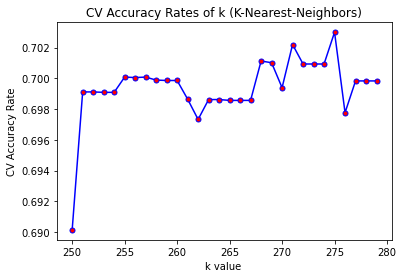

In [30]:
# create a line graph for testing accuracy
import matplotlib.pyplot as plt
plt.plot(k_range, scores_cv, 'y', color='blue',marker='o', markerfacecolor='red', markersize='5')
plt.xlabel('k value ')
plt.ylabel('CV Accuracy Rate')
plt.title('CV Accuracy Rates of k (K-Nearest-Neighbors)')
plt.show()

In [31]:
# find best k with the highest cv accuracy
import operator
index, value = max(enumerate(scores_cv), key=operator.itemgetter(1))
print('best k = ', index+1, 'accuracy = ', value)

best k =  26 accuracy =  0.7030020492347424


#### k = 18 seems to be too many, let's pick the smallest one that provides good accuracy --> k=6, accuacy = 0.7

### 5. KNN: Model Creation
Creating KNN model from the entrie data set, with the best k found in the previous step.

In [32]:
#Step 1: Import the sklearn class
from sklearn.neighbors import KNeighborsClassifier

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=6 (best k) 
best_knn = KNeighborsClassifier(n_neighbors=26, metric = 'euclidean') 

#Step 3: Fit the model with data (model training)
#Model is learning the relationship between data (X) and class(Y)
best_knn.fit(X,Y)

KNeighborsClassifier(metric='euclidean', n_neighbors=26)

In [33]:
import pickle
pickle.dump(best_knn, open('best_knn.pkl', 'wb'))
pickle.dump(mms, open('normalization.pkl', 'wb'))

### 6. KNN: Deploying the model
What are the predicted class labels of the new data (abalone_new_sample.csv) using the best classification model?

#### 6.1 Data Pre-processing for New Data
Is data in "abalone_new_sample.csv" ready for prediction? If not, fix it first.

In [34]:
# Predict the class label for new record(s)
X_new = pd.read_csv('rawTcas.csv')  # (1) read new instances
X_new

C:\Users\bunru\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (23,24,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,AcademicYear,AcademicSemester,PrefixName,Sex,FacultyID,FacultyName,DepartmentCode,DepartmentName,MajorName,EntryTypeID,...,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Status
0,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
1,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
2,2562,1,MR.,Male,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
3,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
4,2562,1,MISS,Female,10,School of Liberal Arts,1005,Thai Language and Culture for Foreigners,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MFU student
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36396,2563,1,MISS,Female,12,School of Management,1205,Tourism Management,NaN,29,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Not MFU student
36397,2563,1,MISS,Female,14,School of Agro-industry,1407,Posthavest Technology and Logistics,NaN,29,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,Not MFU student
36398,2563,1,MISS,Female,12,School of Management,1205,Tourism Management,NaN,29,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Not MFU student
36399,2563,1,MISS,Female,12,School of Management,1205,Tourism Management,NaN,29,...,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,Not MFU student


In [35]:
cat_data = X_new[['Sex','FacultyName','TCAS','StudentType','Country','Status']]
cat_data.head()

,Sex,FacultyName,TCAS,StudentType,Country,Status
0,Female,School of Liberal Arts,5,FOREIGN,China,MFU student
1,Male,School of Liberal Arts,5,FOREIGN,Korea,MFU student
2,Male,School of Liberal Arts,5,FOREIGN,China,MFU student
3,Female,School of Liberal Arts,5,FOREIGN,China,MFU student
4,Female,School of Liberal Arts,5,FOREIGN,NaN,MFU student


In [36]:
def mycalc(row):
    if row['StudentType'] == 'THAI' :
        return 'Thailand'
    else:
        return row['Country']

In [37]:
cat_data['Flag'] = cat_data.apply(mycalc, axis = 1)
cat_data.head(50)

<ipython-input-37-6126eb4a6aea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data['Flag'] = cat_data.apply(mycalc, axis = 1)


,Sex,FacultyName,TCAS,StudentType,Country,Status,Flag
0,Female,School of Liberal Arts,5,FOREIGN,China,MFU student,China
1,Male,School of Liberal Arts,5,FOREIGN,Korea,MFU student,Korea
2,Male,School of Liberal Arts,5,FOREIGN,China,MFU student,China
3,Female,School of Liberal Arts,5,FOREIGN,China,MFU student,China
4,Female,School of Liberal Arts,5,FOREIGN,NaN,MFU student,NaN
5,Female,School of Liberal Arts,5,FOREIGN,China,MFU student,China
6,Female,School of Liberal Arts,5,FOREIGN,Korea,MFU student,Korea
7,Female,School of Liberal Arts,5,FOREIGN,China,MFU student,China
8,Male,School of Liberal Arts,5,FOREIGN,China,MFU student,China
9,Female,School of Liberal Arts,5,FOREIGN,Korea,MFU student,Korea


In [38]:
cat_data=cat_data.drop(['Country'], axis=1)
cat_data

,Sex,FacultyName,TCAS,StudentType,Status,Flag
0,Female,School of Liberal Arts,5,FOREIGN,MFU student,China
1,Male,School of Liberal Arts,5,FOREIGN,MFU student,Korea
2,Male,School of Liberal Arts,5,FOREIGN,MFU student,China
3,Female,School of Liberal Arts,5,FOREIGN,MFU student,China
4,Female,School of Liberal Arts,5,FOREIGN,MFU student,NaN
...,...,...,...,...,...,...
36396,Female,School of Management,5,THAI,Not MFU student,Thailand
36397,Female,School of Agro-industry,5,THAI,Not MFU student,Thailand
36398,Female,School of Management,5,THAI,Not MFU student,Thailand
36399,Female,School of Management,5,THAI,Not MFU student,Thailand


In [39]:
cat_data=cat_data.dropna()

In [40]:
class_target = cat_data.Status
class_target

0            MFU student
1            MFU student
2            MFU student
3            MFU student
5            MFU student
              ...       
36396    Not MFU student
36397    Not MFU student
36398    Not MFU student
36399    Not MFU student
36400    Not MFU student
Name: Status, Length: 36303, dtype: object

In [41]:
cat_data=cat_data.drop(['Status'], axis=1)
cat_data

,Sex,FacultyName,TCAS,StudentType,Flag
0,Female,School of Liberal Arts,5,FOREIGN,China
1,Male,School of Liberal Arts,5,FOREIGN,Korea
2,Male,School of Liberal Arts,5,FOREIGN,China
3,Female,School of Liberal Arts,5,FOREIGN,China
5,Female,School of Liberal Arts,5,FOREIGN,China
...,...,...,...,...,...
36396,Female,School of Management,5,THAI,Thailand
36397,Female,School of Agro-industry,5,THAI,Thailand
36398,Female,School of Management,5,THAI,Thailand
36399,Female,School of Management,5,THAI,Thailand


In [42]:
num_data = cat_data.TCAS
num_data

0        5
1        5
2        5
3        5
5        5
        ..
36396    5
36397    5
36398    5
36399    5
36400    5
Name: TCAS, Length: 36303, dtype: int64

In [43]:
cat_data=cat_data.drop(['TCAS'], axis=1)
cat_data

,Sex,FacultyName,StudentType,Flag
0,Female,School of Liberal Arts,FOREIGN,China
1,Male,School of Liberal Arts,FOREIGN,Korea
2,Male,School of Liberal Arts,FOREIGN,China
3,Female,School of Liberal Arts,FOREIGN,China
5,Female,School of Liberal Arts,FOREIGN,China
...,...,...,...,...
36396,Female,School of Management,THAI,Thailand
36397,Female,School of Agro-industry,THAI,Thailand
36398,Female,School of Management,THAI,Thailand
36399,Female,School of Management,THAI,Thailand


In [44]:
# One-hot encoding for nominal features
cat_data = pd.get_dummies(cat_data)
cat_data.head()

,Sex_Female,Sex_Male,FacultyName_School of Agro-industry,FacultyName_School of Cosmetic Science,FacultyName_School of Dentistry,FacultyName_School of Health Science,FacultyName_School of Information Technology,FacultyName_School of Integrative Medicine,FacultyName_School of Law,FacultyName_School of Liberal Arts,...,Flag_Laos,Flag_Mali,Flag_Myanmar,Flag_Philippines,Flag_South Africa,Flag_South Korea,Flag_Taiwan,Flag_Thailand,Flag_United Kingdom of Great Britain and Northern Ireland,Flag_United States of America
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
transform_num_data = pd.concat([cat_data, num_data], axis=1)
transform_num_data.head()

,Sex_Female,Sex_Male,FacultyName_School of Agro-industry,FacultyName_School of Cosmetic Science,FacultyName_School of Dentistry,FacultyName_School of Health Science,FacultyName_School of Information Technology,FacultyName_School of Integrative Medicine,FacultyName_School of Law,FacultyName_School of Liberal Arts,...,Flag_Mali,Flag_Myanmar,Flag_Philippines,Flag_South Africa,Flag_South Korea,Flag_Taiwan,Flag_Thailand,Flag_United Kingdom of Great Britain and Northern Ireland,Flag_United States of America,TCAS
0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
1,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
5,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5


In [46]:
X_new = transform_num_data
X_new.shape


(36303, 39)

#### 6.2 What are the predicted class labels of the new data using the best classification model?

In [47]:
X_new = mms.transform(X_new) # (2) normalize them using the normalization model created previously (sc is StandardScaler)
prediction = best_knn.predict(X_new) # (3) predict their class lables

In [48]:
prediction

array(['MFU student', 'MFU student', 'MFU student', ..., 'MFU student',
       'MFU student', 'Not MFU student'], dtype=object)

In [49]:
aa = pd.DataFrame(prediction)
aa.tail()

,0
36298,MFU student
36299,Not MFU student
36300,MFU student
36301,MFU student
36302,Not MFU student
